## Analysis of the 2009 Kenya's Population Census with Python

In this project, I perform statistical analysis of the 2009 population census results, create meaningful visualizations to describe the data and develop a Simple Linear Regression model to fit two features of the dataset.

The dataset describes the County population with the following attributes: County name, Male, Female, Total, Number of HouseHolds, Area in Square Kilometer, Gender Index, Population Density, and HouseHold Density.

The project is done using Python.

Data Source: <a href="opendata.arcgis.com">opendata.arcgis.com</a>

In [42]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

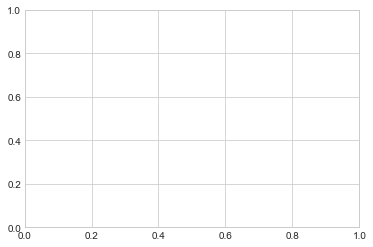

<Figure size 432x288 with 0 Axes>

In [23]:
# for plotting tasks we can set the following:

plt.style.use('seaborn-whitegrid')
ax = plt.axis()
fig = plt.figure()

In [3]:
# the data is in a csv format

df = pd.read_csv('County_Population_2009.csv')

# getting the first five rows of the dataset
df.head()

,County,Male,Female,Total,No_of_HouseHolds,Area_in_Square_Km,Gender_Index,Household_Density,Population_Density,Location_1,OBJECTID
0,BARINGO,279081,276480,555561,110649,11015.34,1.0,50.44,50.44,"(0.66898646421, 35.9461427526)",0
1,BOMET,359727,364459,724186,142361,2471.30,1.0,293.04,293.04,"(-0.828313516948, 35.2718580721)",1
2,BUNGOMA,671548,703515,1375063,270824,3032.15,1.0,453.49,453.49,"(0.751266866555, 34.6400640229)",2
3,BUSIA,356122,387824,743946,154225,1695.03,1.1,438.90,438.90,"(0.414922272151, 34.2119561811)",3
4,ELGEYO MARAKWET,183738,186260,369998,77555,3029.78,1.0,122.12,122.12,"(-0.599583761487, 37.6238616686)",4


We can first get a coincise summary of the dataframe using with a single of code below:

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47 entries, 0 to 46
Data columns (total 11 columns):
County                47 non-null object
Male                  47 non-null int64
Female                47 non-null int64
Total                 47 non-null int64
No_of_HouseHolds      47 non-null int64
Area_in_Square_Km     47 non-null float64
Gender_Index          47 non-null float64
Household_Density     47 non-null float64
Population_Density    47 non-null float64
Location_1            47 non-null object
OBJECTID              47 non-null int64
dtypes: float64(4), int64(5), object(2)
memory usage: 4.1+ KB


The population dataset has 47 entries representing the 47 counties in Kenya. There are 11 features with different datatypes. The dataset has no missing values and therefore we can proceed to the statistical analysis. All the columns are of the appropriate datatype.

In [5]:
# for summary statistics of each column, we apply the describe function:

df.describe()

,Male,Female,Total,No_of_HouseHolds,Area_in_Square_Km,Gender_Index,Household_Density,Population_Density,OBJECTID
count,4.700000e+01,4.700000e+01,4.700000e+01,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000
mean,4.083502e+05,4.131413e+05,8.214914e+05,186552.212766,12368.365532,1.006383,408.451064,408.450213,23.000000
std,2.553734e+05,2.533304e+05,5.077810e+05,151470.292010,17387.663228,0.076341,883.424912,883.420925,13.711309
min,5.304500e+04,4.849400e+04,1.015390e+05,22184.000000,218.860000,0.800000,4.100000,4.100000,0.000000
25%,2.616730e+05,2.719520e+05,5.413380e+05,106881.500000,2536.900000,1.000000,40.830000,40.830000,11.500000
50%,3.764880e+05,3.764770e+05,7.529650e+05,154225.000000,3337.090000,1.000000,183.740000,183.740000,23.000000
75%,4.780210e+05,4.894330e+05,9.663515e+05,205873.000000,14846.890000,1.100000,355.125000,355.125000,34.500000
max,1.605230e+06,1.533139e+06,3.138369e+06,985016.000000,70961.190000,1.100000,4514.990000,4514.960000,46.000000


We can further compute the population size, population range (total number of Females - total number of males) and the average Kenya's population.

In [6]:
total_female = df['Female'].sum()
total_male = df['Male'].sum()

population_size = total_female + total_male # total population
population_range = total_female - total_male # range
population_ratio = total_male/total_female # ratio of Male to Female
print(population_size)
print(population_range)
print(population_ratio)
print(population_size/47)

38610097
225181
0.9884032760110537
821491.4255319149


## Descriptive Statistics

The descriptive statistics for <b>Male</b> and<b> Female</b> attributes is as shown in the table below:   
<table border='18'>
    <tr>
        <td><b>Gender</b></td>
        <td><b>Sum</b></td>
        <td><b>Mean</b></td>
        <td><b>Median</b></td>
        <td><b>variance</b></td>
    </tr>
    <tr>
        <td>Male</td>
        <td>19,192,458</td>
        <td>408,350</td>
        <td>376,488</td>
        <td>255,373</td>
    </tr>
    <tr>
        <td>Female</td>
        <td>19,417,639</td>
        <td>413,141</td>
        <td>376,477</td>
        <td>253,330</td>
    </tr>
    <tr>
        <td><b>TOTAL</b></td>
        <td><b>38, 610, 097</b></td>
        <td><b>821,491</b></td>
        <td><b>752,965</b></td>
        <td><b>507,781</b></td>
    </tr>
</table>
<p text-align='center'><b>Population Range = 225,181</b></p>
<p><b>Population Ratio</b> of Male to Female is <b>0.9884032760110537</b><p>

<p><b>Nairobi County</b> has the <b>highest</b> number of Males and Females at 1,605,230 and 	1,533,139 respectively. On the other hand, <b>Lamu county</b> has the <b>smallest</b> number of Males and Females at 53,045 and 48,494 respectively.</p>

<p><b>Nairobi County</b> leads with the highest total population of <b>3,138,369</b> while <b>Lamu County</b> has the lowest total population of both gender at <b>101,539</b></p> 

### Number of HouseHolds

<p>Total number of households = <b>8,767,954</b></p>
<p>Average number of HouseHolds in the 47 Counties = <b>186,552.212766</b></p> 
<p>Modal number of Households = <b>154,225</b></p>
<p>Standard deviation of the number of HouseHolds = <b>151,470.292010</b></p>

### Population Proportions

In [7]:
proportion_of_male = (total_male/population_size)*100
proportion_of_female = (total_female/population_size)*100
print(proportion_of_male)
print(proportion_of_female)

49.70839104600022
50.29160895399978


50.29 percent of the 2009 population census were Females while 49.71 percent of the population were males. We notice that there is no significant difference between the proportion of Female and Male.

For a visualization of how various attributes are distibuted, we can plot a distribution plot as follows:  

Text(0.5, 1.0, 'Distribution plot for the number of Females')

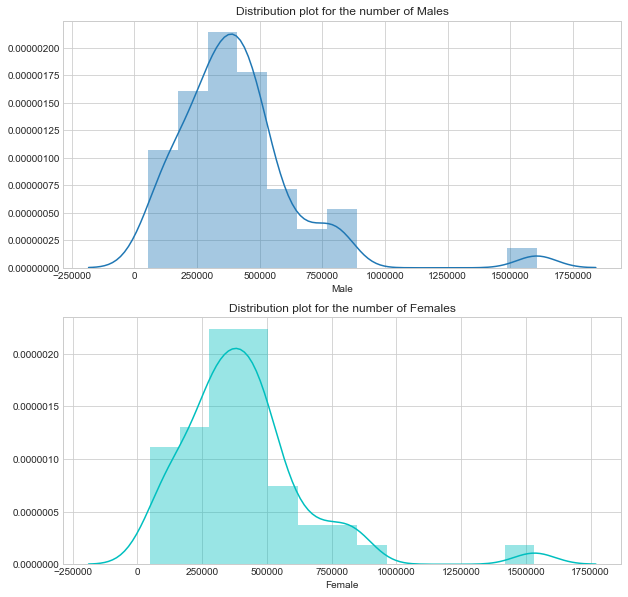

In [30]:
plt.figure(figsize=(10,10))

plt.subplot(2, 1, 1)
sns.distplot(df['Male'])
plt.title('Distribution plot for the number of Males')

plt.subplot(2, 1, 2)
sns.distplot(df['Female'], color='c')
plt.title('Distribution plot for the number of Females')


### Sorting the Attributes

We can sort the dataframe by <b>'Area_in_Square_Km'</b>, to find the County of the smallest and largest araes and their corresponding populations respectively:

In [9]:
# we can create a new dataframe named df2

county = df['County']
size = df['Area_in_Square_Km']
total_population = df['Total']
number_of_households = df['No_of_HouseHolds']
df2 = pd.DataFrame([county, size, total_population, number_of_households],
                   index=['County', 'area_in_sqr_km','total_population', 'number_of_households']).T

# sorting df2 dataframe by 'Area_in_sqr_km'
df2.sort_values(by='area_in_sqr_km', ascending=True)

,County,area_in_sqr_km,total_population,number_of_households
27,MOMBASA,218.86,939370,268700
44,VIHIGA,530.9,554622,123347
29,NAIROBI,695.1,3138369,985016
33,NYAMIRA,899.33,598252,131039
15,KISII,1317.53,1152282,245029
14,KIRINYAGA,1479.09,528054,154220
3,BUSIA,1695.03,743946,154225
16,KISUMU,2085.93,968909,226719
1,BOMET,2471.3,724186,142361
11,KERICHO,2478.99,758339,160134


The above dataframe shows the arrangement of counties in ascending order of their arae in square km. We notice that:
<p><b>Mombasa County</b> has the smallest area of <b>218.86km<sup>2</sup></b> while <b>Marsabit County</b> has the largesr area of <b>70961.2km<sup>2</sup></p> 

In [12]:
# total area of Kenya

df2['area_in_sqr_km'].sum()

581313.1800000002

The area of Kenya is <b>581,313.1800000002km<sup>2</sup></b>

Let us sort the dataframe by the <b>total population</b> in each county:

In [10]:
df2.sort_values(by='total_population', ascending=True)

,County,area_in_sqr_km,total_population,number_of_households
20,LAMU,6273.12,101539,22184
8,ISIOLO,25336.1,143294,31326
36,SAMBURU,21022.2,223947,47354
39,TANA RIVER,38436.9,240075,47414
38,TAITA TAVETA,17084,284657,71090
24,MARSABIT,70961.2,291166,56941
40,THARAKA NITHI,2638.83,365330,88803
4,ELGEYO MARAKWET,3029.78,369998,77555
19,LAIKIPIA,9461.92,399227,103114
46,WEST POKOT,9169.41,512690,93777


We notice the following:
<p>Nairobi County has the largest population of <b>3,138,369</b>. Kakamega County comes second with a population of <b>1660651</b> while Kiambu Couty ranks third with a population of <b>1,623,282</b></p>

<p>Lamu Couty has the smallest population of <b>101,539</b> followed by Isiolo County with a population of  <b>143,294</b></p>

<p>Although <b>Mombasa County</b> has the smallest area among all the counties, the county ranks 15 among the counties with the highest population of <b>942,581</b></p>
<p>Again, Marsabit Couty has the largest area but ranks 6<sup>th</sup> among counties with least population of <b>291,166</b>

Text(0.5, 1.0, "Distribution of the country's population")

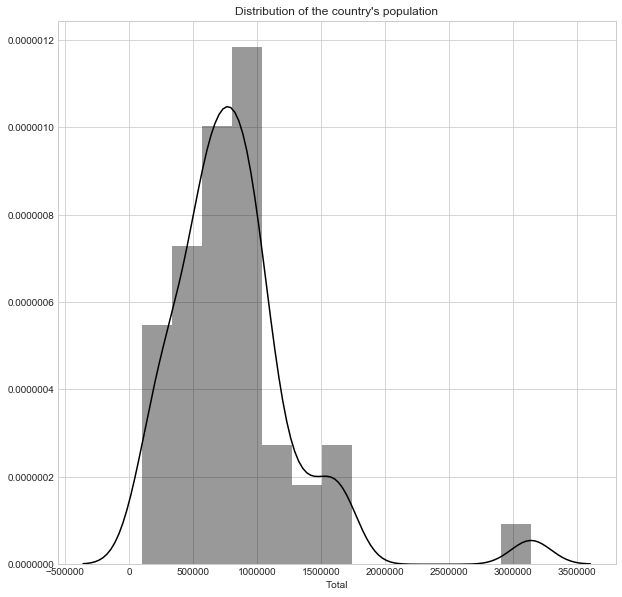

In [64]:
# use a distribution plot to visaulize the above result

plt.figure(figsize=(10,10))
sns.distplot(df['Total'], color='k')
plt.title("Distribution of the country's population")

The distribution of the total population does not follow a normal distribution. The average population for the counties is 821,491.

We can also sort the dataframe by the <b>'Number of Households'</b> in each County:

In [22]:
df2.sort_values(by='number_of_households',ascending = True)

,County,area_in_sqr_km,total_population,number_of_households
20,LAMU,6273.12,101539,22184
8,ISIOLO,25336.1,143294,31326
36,SAMBURU,21022.2,223947,47354
39,TANA RIVER,38436.9,240075,47414
24,MARSABIT,70961.2,291166,56941
38,TAITA TAVETA,17084,284657,71090
4,ELGEYO MARAKWET,3029.78,369998,77555
45,WAJIR,56685.8,661941,88574
40,THARAKA NITHI,2638.83,365330,88803
46,WEST POKOT,9169.41,512690,93777


Here, we note the fact that counties population determines the number of households in the county. Lamu county with the least population of <b>101,539</b>has the least number of households of <b>22,184</b> while Nairobi County with the highest population of <b>3,138,369</b> has the greatest number of households of <b>985,016</b>

Text(0.5, 1.0, 'Distribution plot of the Number of Households')

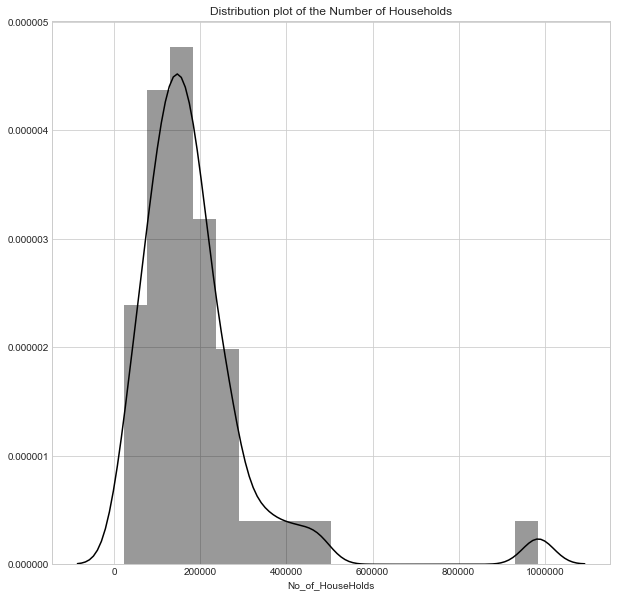

In [28]:
plt.figure(figsize=(10,10))

sns.distplot(df['No_of_HouseHolds'], color='k')
plt.title('Distribution plot for the Number of Households')

## Correlations

Suppose we want to understand the relationship between different variables in the dataframe: 

Let us look at a scatter plot of <b>'Total population in a county'</b> and the <b>'Area of the county'</b>. Also, we develop a scatter plot for the<b> 'Area_in_Square_Km' of a county and the <b>'Total'</b> population. 

Text(0, 0.5, 'Total Population')

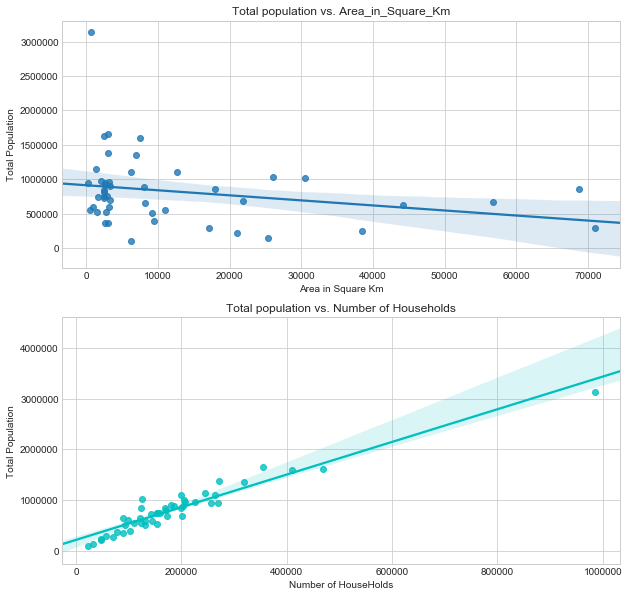

In [34]:
plt.figure(figsize=(10, 10))

plt.subplot(2, 1, 1)
sns.regplot(x='Area_in_Square_Km', y='Total', data=df)
plt.title('Total population vs. Area_in_Square_Km')
plt.xlabel('Area in Square Km')
plt.ylabel('Total Population')

plt.subplot(2, 1, 2)
sns.regplot(x='No_of_HouseHolds', y='Total', color='c', data=df)
plt.title('Total population vs. Number of Households')
plt.xlabel('Number of HouseHolds')
plt.ylabel('Total Population')

In the firts plot, we notice a <b>negative linear relationship </b>between area in km<sup>2</sup> and the total population of that particular county. Although the relationship is negative, we can still consider area in square km as a good predictor of the population in a particular county.
    
In the second plot, we see a steep straight line through the data points. This shows that there is a <b>positive lenear relationship</b> between the number of households in each county and the total population in that county.

In [46]:
# pearson correlation and the p-value:
stats.pearsonr(df['Total'], df['No_of_HouseHolds'])

(0.9575459262317972, 6.062236158739039e-26)

The <b>pearson correlation coefficient</b> is <b>0.9574</b> which is very close to 1.
The <b>p-value</b> is <b>6.06e-26</b> < 0.001, which implies a strong certainity about the above correlation coefficient we've just calculated. We can therefore conclude that there is <b>positive correlation</b> between the number of households and the total population. We are also certain about the strong positive correlation.

In [47]:
stats.pearsonr(df['Total'], df['Area_in_Square_Km'])

(-0.2512537969730112, 0.08846062241040503)

The <b>pearson correlation coefficient</b> is <b>-0.2513</b> which is almost close to -1. The <b>p-value</b> is <b>0.08846</b> suggesting a moderate certainity in the result.

## Model Development
We are going to try and predict the <b>total population</b> of County using the <b>'Number of Households'</b> in that particular county. We will develop a <b>Simple Linear Regression Model</b> to help us understand the relationship between the two variables. In this case, the <b>predictor variable</b> is the <b>Number of Household</b> and the <b>target variable</b> is the <b>total population</b> of a county.

In [49]:
# we first import linear model from scikit-learn

from sklearn.linear_model import LinearRegression

In [51]:
# create a linear regression object using the constructor.
lm = LinearRegression()

# define the predictor and target variables
x = df[['No_of_HouseHolds']] # total number of households in a county
y = df[['Total']] # total population in a county

# use lm.fit(x,y) to fit the model
lm.fit(x, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [53]:
# we can view the intercept(b0):
lm.intercept_

array([222653.95672321])

In [54]:
# we can view the slope
lm.coef_

array([[3.21002608]])

The <b>relationship </b>between <b>'Number of HouseHolds'</b> and the <b.'Total Population'</b> is given by:

<b>Total_population = 222,653.95672321 + 3.21002608*Number_of_HouseHolds</b>

<b>REMARK:</b> an increase in one unit in number of households, the total population of the county increases by approximately 3 units.  

In [52]:
# we can obtain a prediction using the method predict
Yhat = lm.predict(x)

Let us predict total population of a county using the number of households in that particular county:

In [60]:
# BARINGO COUNTY
print(lm.predict([[110649]]))

# NAIROBI COUNTY
print(lm.predict([[985016]]))

[[577840.13277432]]
[[3384581.00883544]]


For Nairobi County, the <b>actual</b> total population is <b>3,138,369</b> while the <b>predicted total population</b> is <b>3,384,581</b>. This seems reasonable as the value is not negative, extremely big or extremely small.

### R-squared (R<sup>2</sup>) - coefficient of determination
We are going to use the <b>R<sup>2</sup></b> to dertmine the fit  of this model. This will measure how close the data is to the fitted regression line.

So, how close is the actual data to this fitted (or estimated) model?

In [58]:
lm.score(x,y)

0.9168942008431111

<b>R<sup>2</sup></b> is <b>0.9168942008431111</b>. This implies that approximately, <b>91.69%</b> of the variation of the total population is explained by this simple linear model.